In [1]:
from liebTB import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

# Lieb lattice with 65 sites

In [3]:
nx, ny = 5, 5
alpha = 0. # disorder strength 
lat = liebTB()
lat.get_lattice(nx=nx, ny=nx)
lat.remove_dangling(1)

## Uniform hoppings

In [16]:
sys = liebEig(lat)
plot = plotTB(sys)
t_ab, t_ba = 0.5, 0.5
t_ac, t_ca = t_ab, t_ba
c = 0.5
sys.set_nearest_neighbor_hop(t_ab=t_ab, t_ba=t_ba, t_ac=t_ac, t_ca=t_ca)
sys.set_next_nearest_neighbor_hop(c=c)

ab 0.5 ba 0.5 ac 0.5 ca 0.5
next_nearest hoppings
t++ 0.5 t-- 0.5 t+- 0.5 t-+ 0.5


## Alternating hoppings

In [39]:
sys = liebEig(lat)
plot = plotTB(sys)
t_ab, t_ba = np.round(4/3, 2), np.round(2/3, 2)
t_ac, t_ca = t_ab, t_ba
c = 0.5 # nnn strength
sys.set_nearest_neighbor_hop(t_ab=t_ab, t_ba=t_ba, t_ac=t_ac, t_ca=t_ca)
sys.set_next_nearest_neighbor_hop(c=c)

ab 1.33 ba 0.67 ac 1.33 ca 0.67
next_nearest hoppings
t++ 0.707106781187 t-- 0.707106781187 t+- 0.57879184514 t-+ 0.815475321515


### Disorder

In [ ]:
alpha = 0.5

Generic disorder

In [ ]:
sys.set_disorder_hop(alpha)

Pair disorder

In [ ]:
sys.set_disorder_pair(alpha)

Placket disorder

In [ ]:
sys.set_disorder_placket(alpha)

### Dimerization defect line along x

In [40]:
sys.set_defect_dimer_x(4)

### Dimerization defect line along  y

In [41]:
sys.set_defect_dimer_y(4)

## Solve eigenvalues problem

In [42]:
sys.get_ham(complex_transpose=True)
sys.get_eig(eigenvec=True)
zero_mode = sys.get_state_pola(tag_pola=b'a')

State with polarization: [ 1.]


/Users/cpoli/Dropbox/prog/python/TB/plotTB.py:117: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 66 but corresponding boolean dimension is 65
  ax1.plot(x[ind], self.sys.en.real[ind], 'ob', markersize=ms)
/Users/cpoli/Dropbox/prog/python/TB/plotTB.py:126: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 66 but corresponding boolean dimension is 65
  ax2.plot(x[ind], np.ravel(self.sys.pola[ind, i_tag]), 'or', markersize=(4*ms)//5)
/Users/cpoli/Dropbox/prog/python/TB/plotTB.py:146: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 66 but corresponding boolean dimension is 65
  ax1.set_xlim([x[ind][0]-0.1, x[ind][-1]+0.1])
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results mi

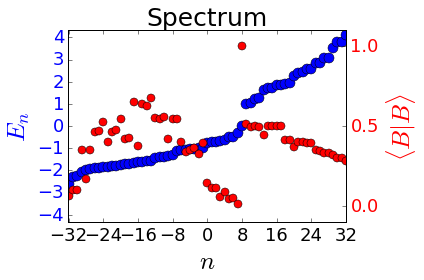

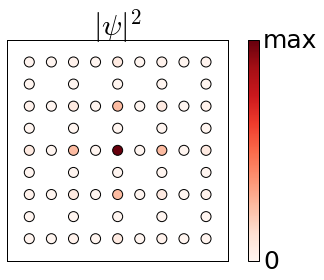

In [43]:
s = 100
fig_spectrum = plot.spectrum(tag_pola=b'a', fs=25)
fig_zero_mode = plot.intensity(zero_mode, s=s, fs=25)

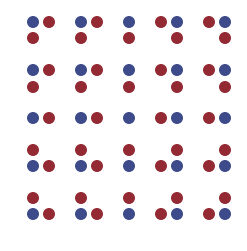

In [44]:
sys.hop['t'] = 2*np.exp(-sys.hop['t'])
if alpha == 0:
    sys.get_coor_hop()
else:
    sys.get_coor_hop_dis()
fig_coor_real = plot.lattice_hop(ms=12)

In [21]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
              dir_name='lieb_supp', ext='pdf')
save.fig(fig_zero_mode, 'zero_mode_uni')
save.fig(fig_spectrum, 'spectrum_uni')
save.fig(fig_coor_real, 'lattice_real_uni')

In [26]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
              dir_name='lieb_supp', ext='pdf')
save.fig(fig_zero_mode, 'zero_mode')
save.fig(fig_spectrum, 'spectrum')
save.fig(fig_coor_real, 'lattice_real')

In [35]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
              dir_name='lieb_supp', ext='pdf')
save.fig(fig_zero_mode, 'zero_modeX')
save.fig(fig_spectrum, 'spectrumX')
save.fig(fig_coor_real, 'lattice_realX')

In [45]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
              dir_name='lieb_supp', ext='pdf')
save.fig(fig_zero_mode, 'zero_modeXY')
save.fig(fig_spectrum, 'spectrumXY')
save.fig(fig_coor_real, 'lattice_realXY')

## Charge Fractionization

In [50]:
sys = liebEig(lat)
plot = plotTB(sys)
t_ab, t_ba = np.round(4/3, 2), np.round(2/3, 2)
t_ac, t_ca = t_ab, t_ba
c = 0.01 # nnn strength
sys.set_nearest_neighbor_hop(t_ab=t_ab, t_ba=t_ba, t_ac=t_ac, t_ca=t_ca)
sys.set_next_nearest_neighbor_hop(c=c)
sys.set_defect_dimer_x(4)
sys.set_defect_dimer_y(4)

ab 1.33 ba 0.67 ac 1.33 ca 0.67
next_nearest hoppings
t++ 0.0141421356237 t-- 0.0141421356237 t+- 0.0115758369028 t-+ 0.0163095064303


In [51]:
sys.get_ham(complex_transpose=True)
sys.get_eig(eigenvec=True)
zero_mode = sys.get_state_pola(tag_pola=b'a')

State with polarization: [ 1.]


24 states between -4 and -0.1
17 states between -0.1 and 0.0005
State with polarization: [ 1.]
0.500793956699 0.267661724044
0.461253131096 3.27285239327e-06
0.373463437253
0.500801525189


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


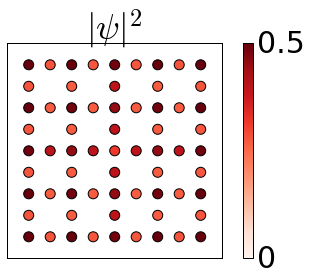

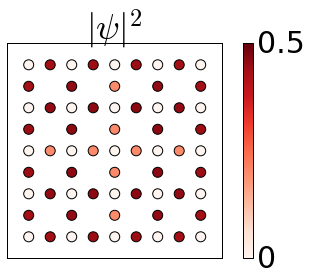

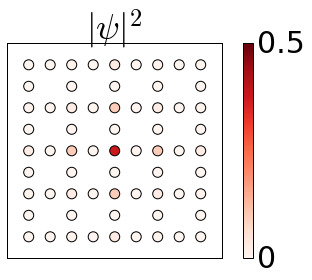

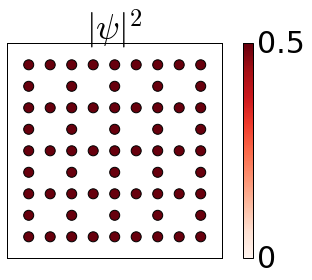

In [52]:
states_neg = sys.get_states_en(en_lims=[-4, -0.1])
states_flatband = sys.get_states_en(en_lims=[-0.1, 5e-4])
zero_mode = sys.get_state_pola(tag_pola=b'a')
states_flatband -= zero_mode
fig_neg = plot.intensity(states_neg, s=s, lims=[0, .5], fs=30)
fig_fb = plot.intensity(states_flatband, s=s, lims=[0, .5], fs=30)
fig_zm = plot.intensity(zero_mode, s=s, lims=[0, .5], fs=30)
fig_sum = plot.intensity(states_neg+.5*states_flatband+.5*zero_mode, s=s, lims=[0, .5], fs=30)
print(np.max(states_neg), np.min(states_neg))
print(np.max(states_flatband), np.min(states_flatband))
print(np.max(zero_mode))
print(np.max(states_neg+.5*states_flatband))

In [54]:
from collections import OrderedDict
save = saveTB(sys=sys, params=OrderedDict([('ta', t_ab), ('tb', t_ba), ('tc', t_ca), ('td', t_ca)]), 
                   dir_name='lieb_supp', ext='pdf')
save.fig(fig_zm, 'intensity_zero_mode')
save.fig(fig_fb, 'intensity_flat')
save.fig(fig_neg, 'intensity_neg')
save.fig(fig_sum, 'intensity_sum')